# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import json
import tweepy
from tweepy import OAuthHandler
import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

%matplotlib inline

In [2]:
df_archive = pd.read_csv('./data/twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, auth=('user', 'pass'))
response.status_code

200

In [6]:
with open("./data/image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [7]:
df_image = pd.read_csv('./data/image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
consumer_key = '**********************'
consumer_secret = '*******************'
access_token = '**********************'
access_secret = '*********************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
count = 0
fails_dict = {}
start = timer()
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)



In [9]:
df_tweet=pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('./data/tweet_json.txt') as file:
    for line in file:
        print(line)
        status=json.loads(line)
        tweet_id=status['id_str']
        rt_count=status['retweet_count']
        fav_count=status['favorite_count']
        df_tweet=df_tweet.append(pd.DataFrame([[tweet_id, rt_count, fav_count]], columns=['tweet_id', 'retweet_count', 'favorite_count']))

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 540, "h": 528, "resize": "fit"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "large": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

{"created_at": "Sat Apr 15 17:32:18 +0000 2017", "id": 853299958564483072, "id_str": "853299958564483072", "full_text": "This is Rumpole. He'll be your Uber driver this evening. Won't start driving until you buckle pup. 13/10 h*ckin safe good boy https://t.co/EX9Z3EXlVP", "truncated": false, "display_text_range": [0, 125], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 853299949064388608, "id_str": "853299949064388608", "indices": [126, 149], "media_url": "http://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg", "media_url_https": "https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg", "url": "https://t.co/EX9Z3EXlVP", "display_url": "pic.twitter.com/EX9Z3EXlVP", "expanded_url": "https://twitter.com/dog_rates/status/853299958564483072/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 510, "h": 680, "resize": "fit"}, "medium": {"w": 900, "h": 1200, "resize": "fit"}, "large": {"w": 1536, "h": 2048, "resi

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# Visual Assessment
# Issue: Dog Stage in 4 columns 'doggo', 'floofer', 'pupper', 'puppo'
# Issue: timestamp

In [12]:
# Check the utility used to post the tweet

In [13]:
df_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [14]:
# Issue: HTML formatted string

In [15]:
# check the iphone source
(df_archive[df_archive["source"].str.contains("iphone", regex=False)]).head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [16]:
df_archive.iloc[0, 5]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [17]:
df_archive.iloc[0, 9]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [18]:
# check the tweeter web client source
(df_archive[df_archive["source"].str.contains("Web", regex=False)]).head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
209,852226086759018497,NaN,NaN,2017-04-12 18:25:07 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet General. He wasn't content with the quali...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852226086...,14,10,General,None,None,None,None


In [19]:
df_archive.iloc[209, 5]

"Meet General. He wasn't content with the quality of his room. Requested to pupgrade, but was ignored. 14/10 look who just lost a customer https://t.co/NP5JW8LnmW"

In [20]:
df_archive.iloc[209, 9]

'https://twitter.com/dog_rates/status/852226086759018497/video/1'

In [21]:
# check the vini source
(df_archive[df_archive["source"].str.contains("vine", regex=False)]).head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
529,808344865868283904,NaN,NaN,2016-12-12 16:16:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,NaN,NaN,NaN,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None


In [22]:
df_archive.iloc[529, 5]

"This is Seamus. He's very bad at entering pools. Still a very good boy tho 11/10 https://t.co/hfi264QwYM"

In [23]:
df_archive.iloc[529, 9]

'https://vine.co/v/5QWd3LZqXxd'

In [24]:
# check the TweetDeck source
(df_archive[df_archive["source"].str.contains("TweetDeck", regex=False)]).head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
972,750086836815486976,NaN,NaN,2016-07-04 22:00:12 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Spanky. He was a member of the 2002 US...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750086836...,12,10,Spanky,None,None,None,None


In [25]:
df_archive.iloc[972, 5]

'This is Spanky. He was a member of the 2002 USA Winter Olympic speed skating team. Accomplished af. 12/10 https://t.co/7tlZPrePXd'

In [26]:
df_archive.iloc[972, 9]

'https://twitter.com/dog_rates/status/750086836815486976/photo/1'

In [27]:
# check source column
df_archive["expanded_urls"].sample(5)

1956    https://twitter.com/dog_rates/status/673612854...
1993    https://twitter.com/dog_rates/status/672609152...
160     https://twitter.com/tallylott/status/860914485...
635     https://twitter.com/dog_rates/status/793601777...
2159    https://twitter.com/dog_rates/status/669571471...
Name: expanded_urls, dtype: object

In [28]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [29]:
# Issue: NaN in the expanded_urls column
df_archive.expanded_urls.isnull().sum()

59

In [30]:
df_archive[df_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [31]:
(df_archive[df_archive.expanded_urls.isnull()]).shape

(59, 17)

In [32]:
df_archive.iloc[30, 5]

'@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution'

In [33]:
df_archive.iloc[228, 5]

'Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet'

In [34]:
df_archive.iloc[313, 5]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [35]:
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [36]:
lower = 0
for i in df_archive['name']:
    if i.islower() == True:
        lower = lower +1
lower

109

In [37]:
# Issue: name with lower case is not name

In [38]:
# Check the rating_numerator and rating_denominator columns

In [39]:
df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

/var/folders/tn/4t0086cs25b6lthwj3fp6rkr0000gn/T/ipykernel_3727/563685121.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,I've been told there's a slight possibility he...,5,10
1712,Here we have uncovered an entire battalion of ...,26,10


In [40]:
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [41]:
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [42]:
df_archive[df_archive['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [43]:
df_archive[df_archive['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [44]:
df_archive.iloc[315, 5]

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [45]:
# Issue: 3 repeated websites in expanded_urls
df_archive.iloc[315, 9]

'https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1'

In [46]:
df_archive.iloc[1016, 5]

"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"

In [47]:
# Issue: no pet in the photo
df_archive.iloc[1016, 9]

'https://twitter.com/dog_rates/status/746906459439529985/photo/1'

In [48]:
# check the tweet_id 
df_archive.iloc[1016, 0]

746906459439529985

In [49]:
df_archive[df_archive['tweet_id'] == 746906459439529985]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [50]:
df_archive[df_archive['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [51]:
df_archive.iloc[313, 5]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [52]:
df_archive.iloc[313, 9]

nan

In [53]:
# Check how many retweets are in the archive table
df_archive['in_reply_to_status_id'].notnull().sum()

78

In [54]:
df_archive['retweeted_status_id'].notnull().sum()

181

In [55]:
# Issue: original tweets, not retweeted

In [56]:
# Check the image table

In [57]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [58]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [59]:
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [60]:
# Issue: dog breed that isn't dog breed 

In [61]:
# Check tweet table 

In [62]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7019,33852
0,892177421306343426,5303,29358
0,891815181378084864,3486,22079
0,891689557279858688,7232,36973
0,891327558926688256,7773,35345


In [63]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   object
 2   favorite_count  2327 non-null   object
dtypes: object(3)
memory usage: 72.7+ KB


In [64]:
# Issue: tweet_id columns is diferent in the tweet table

In [65]:
df_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

### Quality issues
1. Timestamp 

2. Count Columns

3. HTML formatted string

4. NaN in the expanded_urls column

5. name with lower case is not name

6. 3 repeated websites in expanded_urls

7. Removing data: original tweets, not retweeted /  only tweets that have images

8. dog breed that isn't dog breed

9. ID Fields

10. Rating Columns



### Tidiness issues
1. dog Stage in 4 columns 'doggo', 'floofer', 'pupper', 'puppo'

2. Three data sets


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [66]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()

### Issue #1: NaN in the expanded_urls column

#### Define: delete rows with missing values in expanded_urls column using dropna

#### Code

In [67]:
df_archive_clean = df_archive_clean.dropna(subset=['expanded_urls'])

#### Test

In [68]:
df_archive_clean.expanded_urls.isnull().sum()

0

In [69]:
df_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Issue #2: ID Fields

#### Define: change the data type to object of the columns tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id using astype()

#### Code

In [70]:
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_archive_clean['in_reply_to_status_id'] = df_archive_clean['in_reply_to_status_id'].astype(str)
df_archive_clean['in_reply_to_user_id'] = df_archive_clean['in_reply_to_user_id'].astype(str)
df_archive_clean['retweeted_status_id'] = df_archive_clean['retweeted_status_id'].astype(str)
df_archive_clean['retweeted_status_user_id'] = df_archive_clean['retweeted_status_user_id'].astype(str)

#### Test

In [71]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2297 non-null   object
 1   in_reply_to_status_id       2297 non-null   object
 2   in_reply_to_user_id         2297 non-null   object
 3   timestamp                   2297 non-null   object
 4   source                      2297 non-null   object
 5   text                        2297 non-null   object
 6   retweeted_status_id         2297 non-null   object
 7   retweeted_status_user_id    2297 non-null   object
 8   retweeted_status_timestamp  180 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2297 non-null   int64 
 11  rating_denominator          2297 non-null   int64 
 12  name                        2297 non-null   object
 13  doggo                       2297 non-null   obje

### Issue #3: Three Data sets

#### Define: merging the trhee data sets in one 

#### Code

In [72]:
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)

In [73]:
df_clean = pd.merge(df_archive_clean, df_image_clean, on=['tweet_id'], how='left')

In [74]:
df_clean = pd.merge(df_clean, df_tweet_clean, on=['tweet_id'], how='left')

#### Test

In [75]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,7019,33852


In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   object 
 1   in_reply_to_status_id       2297 non-null   object 
 2   in_reply_to_user_id         2297 non-null   object 
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         2297 non-null   object 
 7   retweeted_status_user_id    2297 non-null   object 
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        2297 non-null   object 
 13  doggo                       2297 

### Issue #4: Removing Data

#### Define: Detele rows with missing image predictions using dropna and delete the rows where the column 'retweeted_status_id' and 'in_reply_to_status_id' is not nan

#### Code

In [77]:
df_clean = df_clean.dropna(subset=['jpg_url'])

In [78]:
df_clean = df_clean[df_clean['retweeted_status_id'] == 'nan']

In [79]:
df_clean = df_clean[df_clean['in_reply_to_status_id'] == 'nan']

#### Test

In [80]:
df_clean['retweeted_status_id'].unique()

array(['nan'], dtype=object)

In [81]:
df_clean['in_reply_to_status_id'].unique()

array(['nan'], dtype=object)

In [82]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2296
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   object 
 1   in_reply_to_status_id       1971 non-null   object 
 2   in_reply_to_user_id         1971 non-null   object 
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         1971 non-null   object 
 7   retweeted_status_user_id    1971 non-null   object 
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

### Issue #5: dog stage in 4 columns 'doggo', 'floofer', 'pupper', 'puppo'

#### Define: Transform columns 'doggo', 'floofer', 'pupper', into one column dog_stage using replace

#### Code

In [83]:
df_clean['doggo'] = df_clean.doggo.replace('None', '')
df_clean['floofer'] = df_clean.floofer.replace('None', '')
df_clean['pupper'] = df_clean.pupper.replace('None', '')
df_clean['puppo'] = df_clean.puppo.replace('None', '')

In [84]:
print(df_clean['doggo'].value_counts())
print(df_clean['floofer'].value_counts())
print(df_clean['pupper'].value_counts())
print(df_clean['puppo'].value_counts())

         1898
doggo      73
Name: doggo, dtype: int64
           1963
floofer       8
Name: floofer, dtype: int64
          1762
pupper     209
Name: pupper, dtype: int64
         1948
puppo      23
Name: puppo, dtype: int64


In [85]:
df_clean['dog_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

#### Test

In [86]:
df_clean.dog_stage.value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

### Issue #6: Ratings Columns

#### Define: change the data type of rating_numerator and  rating_denominator to float, replace the wrongs decimal with the correct number and create the column rating dividing the rating_numerator by the  rating_denominator

#### Code

In [87]:
# changing de data type of rating numerator to float
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)

In [88]:
# changing de data type of rating denominator to float
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

In [89]:
# reseting the index of dataframe
df_clean.reset_index(inplace=True, drop=True)

In [90]:
# find decimal rating numerator
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/var/folders/tn/4t0086cs25b6lthwj3fp6rkr0000gn/T/ipykernel_3727/2428022449.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
39,This is Bella. She hopes her smile made you sm...,5.0
499,"This is Logan, the Chow who lived. He solemnly...",75.0
549,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1359,Here we have uncovered an entire battalion of ...,26.0


In [91]:
# replacing the wrong decimals with the correct ones
df_clean['rating_numerator'] = df_clean['rating_numerator'].replace(5.0, 13.5)
df_clean['rating_numerator'] = df_clean['rating_numerator'].replace(75.0, 9.75)
df_clean['rating_numerator'] = df_clean['rating_numerator'].replace(27.0, 1.27)
df_clean['rating_numerator'] = df_clean['rating_numerator'].replace(26.0, 11.26)

In [92]:
# creating a column with the rating
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

#### Test

In [93]:
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/var/folders/tn/4t0086cs25b6lthwj3fp6rkr0000gn/T/ipykernel_3727/4272257327.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
39,This is Bella. She hopes her smile made you sm...,13.50
499,"This is Logan, the Chow who lived. He solemnly...",9.75
549,This is Sophie. She's a Jubilant Bush Pupper. ...,1.27
1359,Here we have uncovered an entire battalion of ...,11.26


In [94]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,7019,33852,,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,5303,29358,,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,3486,22079,,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,7232,36973,,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7773,35345,,1.2


In [95]:
df_clean.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,rating
count,1971.000000,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,1971.000000
mean,12.311913,10.477423,1.201928,0.594558,1.345850e-01,6.016556e-02,1.178367
std,41.598017,6.853275,0.559020,0.272126,1.010527e-01,5.094156e-02,4.087083
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,10.000000,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,1.000000
50%,11.000000,10.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,1.100000
75%,12.000000,10.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,1.200000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,177.600000


In [96]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   object 
 1   in_reply_to_status_id       1971 non-null   object 
 2   in_reply_to_user_id         1971 non-null   object 
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         1971 non-null   object 
 7   retweeted_status_user_id    1971 non-null   object 
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   float64
 11  rating_denominator          1971 non-null   float64
 12  name                        1971 non-null   object 
 13  doggo                       1971 

### Issue #7: Count Columns

#### Define: Change type of the columns image_num, retweet_count, favorite_count to integers using .astype( ) 

#### Code

In [97]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   object 
 1   in_reply_to_status_id       1971 non-null   object 
 2   in_reply_to_user_id         1971 non-null   object 
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         1971 non-null   object 
 7   retweeted_status_user_id    1971 non-null   object 
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   float64
 11  rating_denominator          1971 non-null   float64
 12  name                        1971 non-null   object 
 13  doggo                       1971 

In [98]:
# delete NA in retweet-count and favorite_count
df_clean.dropna(subset=['retweet_count', 'favorite_count'], inplace = True)

In [99]:
# convert image_num, retweet_count, favorite_count to integer
df_clean['img_num'] = df_clean['img_num'].astype(int)
df_clean['retweet_count'] = df_clean['retweet_count'].astype(int)
df_clean['favorite_count'] = df_clean['favorite_count'].astype(int)

In [100]:
# Delete the columns 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 
#'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
#'doggo','floofer', 'pupper', 'puppo',
df_clean = df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 
                          'retweeted_status_user_id', 'retweeted_status_timestamp','doggo','rating_numerator',
                          'rating_denominator', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [101]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1970
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1963 non-null   object 
 1   timestamp       1963 non-null   object 
 2   source          1963 non-null   object 
 3   text            1963 non-null   object 
 4   expanded_urls   1963 non-null   object 
 5   name            1963 non-null   object 
 6   jpg_url         1963 non-null   object 
 7   img_num         1963 non-null   int64  
 8   p1              1963 non-null   object 
 9   p1_conf         1963 non-null   float64
 10  p1_dog          1963 non-null   object 
 11  p2              1963 non-null   object 
 12  p2_conf         1963 non-null   float64
 13  p2_dog          1963 non-null   object 
 14  p3              1963 non-null   object 
 15  p3_conf         1963 non-null   float64
 16  p3_dog          1963 non-null   object 
 17  retweet_count   1963 non-null   i

### Issue #8: dog breed that isn't dog breed

#### Define: Keep the tweets that the prediction 1, 2 and 3 are all true and p1-conf higher than 0.5

#### Code

In [102]:
df_clean = (df_clean[((df_clean['p1_dog'] == True) & (df_clean['p2_dog'] == True) & (df_clean['p3_dog'] == True) 
           & (df_clean['p1_conf'] > 0.5))])

#### Test

In [103]:
df_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,rating
1001,707741517457260545,2016-03-10 01:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your roommate eats your leftover Chili's ...,https://twitter.com/dog_rates/status/707741517...,None,https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg,1,whippet,0.738371,...,Italian_greyhound,0.191789,True,American_Staffordshire_terrier,0.020126,True,558,2297,,1.0
1087,699779630832685056,2016-02-17 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Take all my money. 10/10 https://t.co/B28ebc5LzQ,https://twitter.com/dog_rates/status/699779630...,None,https://pbs.twimg.com/media/CbYd3C9WEAErJ4Z.jpg,1,malinois,0.706038,...,German_shepherd,0.165655,True,Great_Dane,0.059048,True,1114,2515,,1.0
1789,669354382627049472,2015-11-25 03:18:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dug. Dug fucken loves peaches. 8/10 https...,https://twitter.com/dog_rates/status/669354382...,Dug,https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg,1,Chihuahua,0.973990,...,French_bulldog,0.010832,True,Pekinese,0.002099,True,1095,2396,,0.8
801,739606147276148736,2016-06-05 23:53:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benji. He just turned 1. Has already give...,https://twitter.com/dog_rates/status/739606147...,Benji,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg,3,Blenheim_spaniel,0.933755,...,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True,1497,5005,pupper,0.9
389,809220051211603969,2016-12-15 02:14:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyro. He's a Stratocumulus Flop. Tongu...,https://twitter.com/dog_rates/status/809220051...,Kyro,https://pbs.twimg.com/media/CzrtWDbWEAAmIhy.jpg,1,Pomeranian,0.819511,...,Samoyed,0.141241,True,Pembroke,0.013455,True,5258,18918,,1.2
340,817415592588222464,2017-01-06 17:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Strudel. He's rather h*ckin pupset that y...,https://www.gofundme.com/help-strudel-walk-aga...,Strudel,https://pbs.twimg.com/media/C1gLJVpWgAApI3r.jpg,1,Doberman,0.806163,...,black-and-tan_coonhound,0.097386,True,miniature_pinscher,0.085993,True,891,5303,,1.1
313,821765923262631936,2017-01-18 17:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duchess. She uses dark doggo forces to...,https://twitter.com/dog_rates/status/821765923...,Duchess,https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg,1,golden_retriever,0.980071,...,Labrador_retriever,0.008758,True,Saluki,0.001806,True,1557,7916,doggo,1.3
1047,703769065844768768,2016-02-28 02:29:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're trying to watch your favorite tv s...,https://twitter.com/dog_rates/status/703769065...,None,https://pbs.twimg.com/media/CcRKOzyXEAQO_HN.jpg,2,boxer,0.838994,...,Greater_Swiss_Mountain_dog,0.088800,True,bull_mastiff,0.031684,True,1025,3023,,1.0
1755,670073503555706880,2015-11-27 02:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He wants to be a power drill. Ve...,https://twitter.com/dog_rates/status/670073503...,Winston,https://pbs.twimg.com/media/CUyUSuWXIAAZKYF.jpg,1,malamute,0.601886,...,Siberian_husky,0.340106,True,Eskimo_dog,0.050041,True,681,1388,,1.0
1630,672267570918129665,2015-12-03 04:14:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you accidentally open up the front facing...,https://twitter.com/dog_rates/status/672267570...,None,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,...,miniature_pinscher,0.051234,True,Airedale,0.044381,True,539,1318,,1.0


In [104]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 2 to 1969
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        782 non-null    object 
 1   timestamp       782 non-null    object 
 2   source          782 non-null    object 
 3   text            782 non-null    object 
 4   expanded_urls   782 non-null    object 
 5   name            782 non-null    object 
 6   jpg_url         782 non-null    object 
 7   img_num         782 non-null    int64  
 8   p1              782 non-null    object 
 9   p1_conf         782 non-null    float64
 10  p1_dog          782 non-null    object 
 11  p2              782 non-null    object 
 12  p2_conf         782 non-null    float64
 13  p2_dog          782 non-null    object 
 14  p3              782 non-null    object 
 15  p3_conf         782 non-null    float64
 16  p3_dog          782 non-null    object 
 17  retweet_count   782 non-null    in

### Issue #9: repeated websites in expanded_urls

#### Define: keep just the first url in expanded_urls column using split

#### Code

In [105]:
(df_clean[df_clean['expanded_urls'].str.contains(',')]).shape

(282, 21)

In [106]:
df_clean['url'] = df_clean.expanded_urls.apply(lambda x: pd.Series(str(x).split(",")))[0]

In [107]:
df_clean = df_clean.drop(['expanded_urls'], axis=1)

#### Test

In [108]:
df_clean.head()

,tweet_id,timestamp,source,text,name,jpg_url,img_num,p1,p1_conf,p1_dog,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,rating,url
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,...,0.078253,True,kelpie,0.031379,True,3486,22079,,1.2,https://twitter.com/dog_rates/status/891815181...
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,...,0.225770,True,German_short-haired_pointer,0.175219,True,7773,35345,,1.2,https://twitter.com/dog_rates/status/891327558...
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,...,0.178406,True,Pembroke,0.076507,True,15772,56905,,1.3,https://twitter.com/dog_rates/status/890729181...
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,...,0.451038,True,Chihuahua,0.029248,True,6107,27988,doggo,1.4,https://twitter.com/dog_rates/status/890240255...
10,890006608113172480,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,...,0.013884,True,chow,0.008167,True,6157,27067,,1.3,https://twitter.com/dog_rates/status/890006608...


In [109]:
(df_clean[df_clean['url'].str.contains(',')]).shape

(0, 21)

### Issue #10: HTML formatted string

#### Define: extract the source without html 

#### Code

In [110]:
for plataforma in df_clean['source']:
    m = re.search('">(.+?)</a>', plataforma)
    if m:
        found = m.group(1)
        df_clean['source'] = df_clean['source'].replace([plataforma], [found])

In [111]:
# reset the index
df_clean = df_clean.reset_index(drop=True)

#### Test

In [112]:
df_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

In [113]:
df_clean.head(1)

,tweet_id,timestamp,source,text,name,jpg_url,img_num,p1,p1_conf,p1_dog,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,rating,url
0,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,...,0.078253,True,kelpie,0.031379,True,3486,22079,,1.2,https://twitter.com/dog_rates/status/891815181...


In [114]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        782 non-null    object 
 1   timestamp       782 non-null    object 
 2   source          782 non-null    object 
 3   text            782 non-null    object 
 4   name            782 non-null    object 
 5   jpg_url         782 non-null    object 
 6   img_num         782 non-null    int64  
 7   p1              782 non-null    object 
 8   p1_conf         782 non-null    float64
 9   p1_dog          782 non-null    object 
 10  p2              782 non-null    object 
 11  p2_conf         782 non-null    float64
 12  p2_dog          782 non-null    object 
 13  p3              782 non-null    object 
 14  p3_conf         782 non-null    float64
 15  p3_dog          782 non-null    object 
 16  retweet_count   782 non-null    int64  
 17  favorite_count  782 non-null    int

In [115]:
df_clean.describe()

,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,rating
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,1.286445,0.779118,0.113096,0.036298,2383.088235,8706.645780,1.115312
std,0.651833,0.155906,0.101315,0.037153,3850.444535,11653.424136,0.178395
min,1.000000,0.500373,0.000056,0.000008,30.000000,89.000000,0.127000
25%,1.000000,0.640203,0.030723,0.007044,582.250000,2084.250000,1.000000
50%,1.000000,0.790894,0.086820,0.025262,1293.000000,4450.500000,1.100000
75%,1.000000,0.927736,0.168672,0.050624,2858.250000,11192.250000,1.200000
max,4.000000,0.999885,0.467678,0.216839,52966.000000,111817.000000,3.428571


### Issue #11: name with lower case is not name

#### Define: rreplace the dog names that started with lower case because it isn't a name

#### Code

In [116]:
for i in df_clean['name']:
    if i.islower() == True:
        df_clean['name'] = df_clean['name'].replace(i, 'None')

#### Test

In [117]:
for i in df_clean['name']:
    if i.islower() == True:
        print(i)

### Issue #12: Timestamp

#### Define: split timestamp in two columns date and time

#### Code

In [118]:
# spliting the column timestamp
df_clean['date'] = df_clean.timestamp.apply(lambda x: pd.Series(str(x).split(" ")))[0]
df_clean['time'] = df_clean.timestamp.apply(lambda x: pd.Series(str(x).split(" ")))[1]

In [119]:
# deleting the column timestamp
df_clean = df_clean.drop(['timestamp'], axis=1)

#### Test

In [120]:
df_clean.head()

,tweet_id,source,text,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,...,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,rating,url,date,time
0,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,...,kelpie,0.031379,True,3486,22079,,1.2,https://twitter.com/dog_rates/status/891815181...,2017-07-31,00:18:03
1,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,...,German_short-haired_pointer,0.175219,True,7773,35345,,1.2,https://twitter.com/dog_rates/status/891327558...,2017-07-29,16:00:24
2,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,...,Pembroke,0.076507,True,15772,56905,,1.3,https://twitter.com/dog_rates/status/890729181...,2017-07-28,00:22:40
3,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,...,Chihuahua,0.029248,True,6107,27988,doggo,1.4,https://twitter.com/dog_rates/status/890240255...,2017-07-26,15:59:51
4,890006608113172480,Twitter for iPhone,This is Koda. He is a South Australian decksha...,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,...,chow,0.008167,True,6157,27067,,1.3,https://twitter.com/dog_rates/status/890006608...,2017-07-26,00:31:25


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [121]:
df_clean.to_csv("./data/twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [122]:
df_final = pd.read_csv('./data/twitter_archive_master.csv')

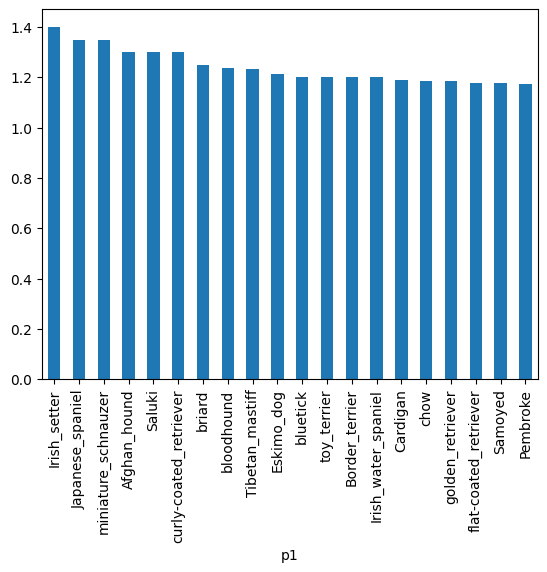

In [123]:
# check the top 20 dog's breed by rating mean
((df_final.groupby('p1')['rating'].mean()).sort_values(ascending=False))[0:20].plot(kind='bar');

In [124]:
((df_final.groupby('p1')['rating'].mean()).sort_values(ascending=False))[0:20]

p1
Irish_setter              1.400000
Japanese_spaniel          1.350000
miniature_schnauzer       1.350000
Afghan_hound              1.300000
Saluki                    1.300000
curly-coated_retriever    1.300000
briard                    1.250000
bloodhound                1.237500
Tibetan_mastiff           1.233333
Eskimo_dog                1.212500
bluetick                  1.200000
toy_terrier               1.200000
Border_terrier            1.200000
Irish_water_spaniel       1.200000
Cardigan                  1.190000
chow                      1.187500
golden_retriever          1.184816
flat-coated_retriever     1.178571
Samoyed                   1.176471
Pembroke                  1.174194
Name: rating, dtype: float64

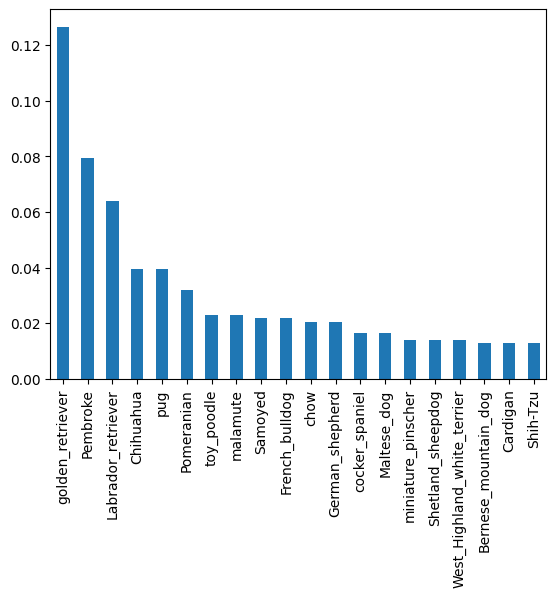

In [125]:
# check what dog's breed have more tweets
((df_final.p1.value_counts()) / (df_final.p1.value_counts().sum())).sort_values(ascending=False)[0:20].plot(kind='bar');

In [126]:
((df_final.p1.value_counts()) / (df_final.p1.value_counts().sum())).sort_values(ascending=False)[0:20]

golden_retriever               0.126598
Pembroke                       0.079284
Labrador_retriever             0.063939
Chihuahua                      0.039642
pug                            0.039642
Pomeranian                     0.031969
toy_poodle                     0.023018
malamute                       0.023018
Samoyed                        0.021739
French_bulldog                 0.021739
chow                           0.020460
German_shepherd                0.020460
cocker_spaniel                 0.016624
Maltese_dog                    0.016624
miniature_pinscher             0.014066
Shetland_sheepdog              0.014066
West_Highland_white_terrier    0.014066
Bernese_mountain_dog           0.012788
Cardigan                       0.012788
Shih-Tzu                       0.012788
Name: p1, dtype: float64

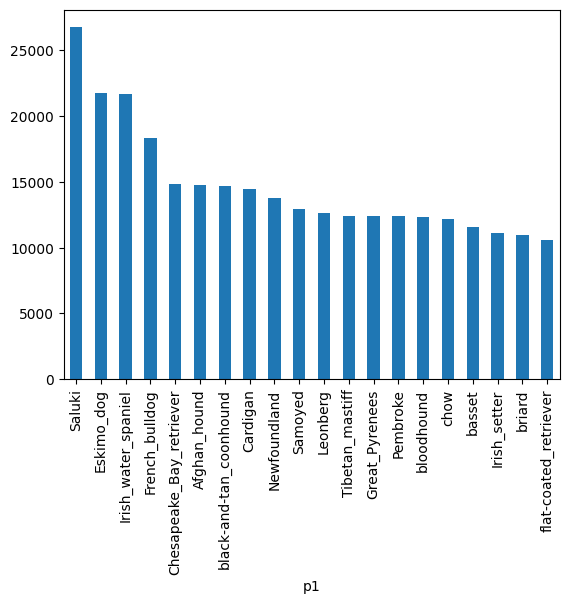

In [127]:
# check what dog's breed have more favorite_count
((df_final.groupby('p1')['favorite_count'].mean()).sort_values(ascending=False))[0:20].plot(kind='bar');

In [128]:
df_final.groupby('p1')['favorite_count'].mean().sort_values(ascending=False)[0:20]

p1
Saluki                      26768.666667
Eskimo_dog                  21795.000000
Irish_water_spaniel         21670.000000
French_bulldog              18354.764706
Chesapeake_Bay_retriever    14863.555556
Afghan_hound                14781.000000
black-and-tan_coonhound     14686.500000
Cardigan                    14439.400000
Newfoundland                13762.500000
Samoyed                     12952.941176
Leonberg                    12668.000000
Tibetan_mastiff             12449.333333
Great_Pyrenees              12447.000000
Pembroke                    12392.209677
bloodhound                  12301.250000
chow                        12210.000000
basset                      11602.125000
Irish_setter                11117.000000
briard                      10962.500000
flat-coated_retriever       10619.285714
Name: favorite_count, dtype: float64

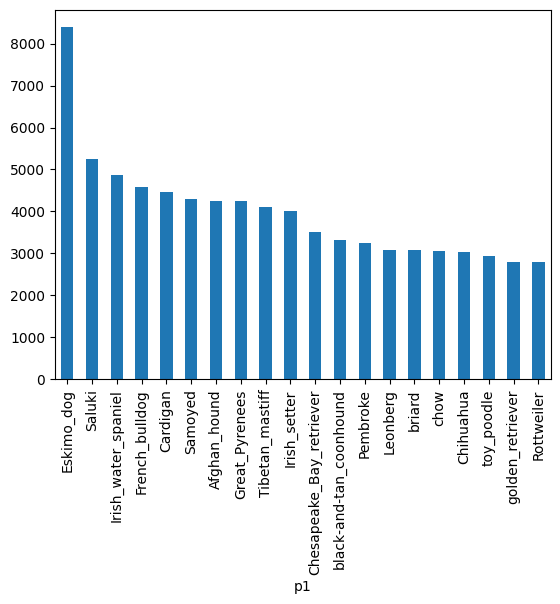

In [129]:
# check what dog's breed have more retweet_count
((df_final.groupby('p1')['retweet_count'].mean()).sort_values(ascending=False))[0:20].plot(kind='bar');

In [130]:
((df_final.groupby('p1')['retweet_count'].mean()).sort_values(ascending=False))[0:20]

p1
Eskimo_dog                  8390.625000
Saluki                      5245.333333
Irish_water_spaniel         4875.000000
French_bulldog              4585.176471
Cardigan                    4467.800000
Samoyed                     4307.705882
Afghan_hound                4248.000000
Great_Pyrenees              4241.333333
Tibetan_mastiff             4111.666667
Irish_setter                4000.000000
Chesapeake_Bay_retriever    3502.888889
black-and-tan_coonhound     3317.000000
Pembroke                    3240.177419
Leonberg                    3089.333333
briard                      3086.500000
chow                        3059.750000
Chihuahua                   3029.258065
toy_poodle                  2930.888889
golden_retriever            2790.424242
Rottweiler                  2789.375000
Name: retweet_count, dtype: float64

In [131]:
# making a copy to simulate linear regression
df_reg = df_final.copy()

In [132]:
df_reg['intercept'] = 1

In [133]:
# linear regression betwenn rating and retweet_count
lm = sm.OLS(df_reg['rating'], df_reg[['intercept', 'retweet_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     75.45
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           2.18e-17
Time:                        10:36:46   Log-Likelihood:                 274.97
No. Observations:                 782   AIC:                            -545.9
Df Residuals:                     780   BIC:                            -536.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         1.0825      0.007    150.985      0.000       1.068       1.097
retweet_count  1.376e-05   1.58e-06      8.686      0.000    1.06e-05    1.69e-05
==============================================================================
Omnibus:                      562.206   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70272.524
Skew:                           2.356   Prob(JB):                         0.00
Kurtosis:                      49.201   Cond. No.                     5.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

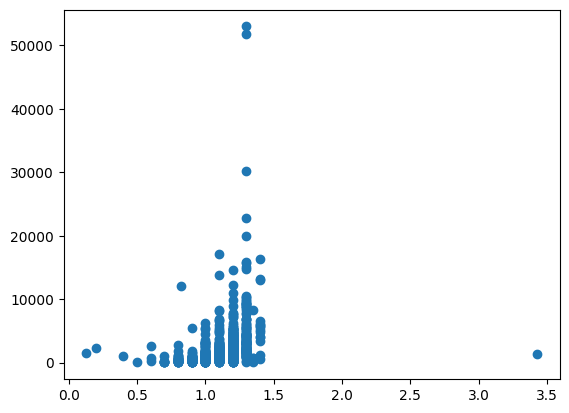

In [134]:
# analyzing the correlation between retweet_count and favorite_count
plt.scatter(data = df_reg, x='rating', y='retweet_count');

In [135]:
# linear regression betwenn favorite_count and rating
lm = sm.OLS(df_reg['rating'], df_reg[['intercept', 'favorite_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     145.2
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           8.81e-31
Time:                        10:36:46   Log-Likelihood:                 305.61
No. Observations:                 782   AIC:                            -607.2
Df Residuals:                     780   BIC:                            -597.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          1.0625      0.007    145.188      0.000       1.048       1.077
favorite_count  6.064e-06   5.03e-07     12.049      0.000    5.08e-06    7.05e-06
==============================================================================
Omnibus:                      628.441   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98723.546
Skew:                           2.780   Prob(JB):                         0.00
Kurtosis:                      57.763   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

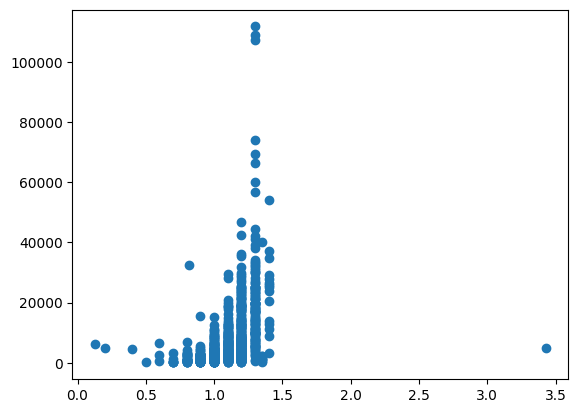

In [136]:
# analyzing the correlation between rating and favorite_count
plt.scatter(data = df_reg, x='rating', y='favorite_count');

In [137]:
df_reg.head()

,tweet_id,source,text,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,...,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,rating,url,date,time,intercept
0,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,...,0.031379,True,3486,22079,NaN,1.2,https://twitter.com/dog_rates/status/891815181...,2017-07-31,00:18:03,1
1,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,...,0.175219,True,7773,35345,NaN,1.2,https://twitter.com/dog_rates/status/891327558...,2017-07-29,16:00:24,1
2,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,...,0.076507,True,15772,56905,NaN,1.3,https://twitter.com/dog_rates/status/890729181...,2017-07-28,00:22:40,1
3,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,...,0.029248,True,6107,27988,doggo,1.4,https://twitter.com/dog_rates/status/890240255...,2017-07-26,15:59:51,1
4,890006608113172480,Twitter for iPhone,This is Koda. He is a South Australian decksha...,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,...,0.008167,True,6157,27067,NaN,1.3,https://twitter.com/dog_rates/status/890006608...,2017-07-26,00:31:25,1


In [138]:
# linear regression betwenn favorite_count and retweet_count
lm = sm.OLS(df_reg['favorite_count'], df_reg[['intercept', 'retweet_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     4041.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):          9.84e-311
Time:                        10:36:47   Log-Likelihood:                -7719.1
No. Observations:                 782   AIC:                         1.544e+04
Df Residuals:                     780   BIC:                         1.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      2103.4034    197.293     10.661      0.000    1716.116    2490.691
retweet_count     2.7709      0.044     63.568      0.000       2.685       2.856
==============================================================================
Omnibus:                      189.186   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6709.810
Skew:                          -0.279   Prob(JB):                         0.00
Kurtosis:                      17.339   Cond. No.                     5.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

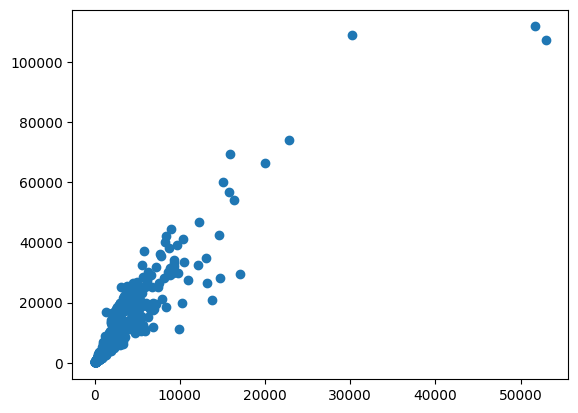

In [139]:
# analyzing the correlation between retweet_count and favorite_count
plt.scatter(data = df_final, x='retweet_count', y='favorite_count');

In [140]:
# multiple linear regression

In [141]:
# multiple linear regression with 'rating', 'p1_conf', 'img_num'
lm = sm.OLS(df_reg['rating'], df_reg[['intercept', 'p1_conf', 'img_num']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.71
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           3.71e-06
Time:                        10:36:48   Log-Likelihood:                 251.42
No. Observations:                 782   AIC:                            -496.8
Df Residuals:                     779   BIC:                            -482.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0428      0.033     31.486      0.000       0.978       1.108
p1_conf        0.0136      0.041      0.333      0.739      -0.066       0.093
img_num        0.0481      0.010      4.942      0.000       0.029       0.067
==============================================================================
Omnibus:                      527.589   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54168.116
Skew:                           2.171   Prob(JB):                         0.00
Kurtosis:                      43.541   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
# duplicate the column name
df_reg['period'] = df_reg['time'].copy()

In [143]:
# replacing time for the period: dawn = 00:00 to 06:00 / morning = 06:00 to 12:00 / afternoon = 12:00 to 18:00 / nigth = 18:00 to 06:00
for i in df_reg['period']:
    if i >= '00:00:00' and i < '06:00:00':
        df_reg['period'] = df_reg['period'].replace(i, "dawn")
    elif i >= '06:00:00' and i < '12:00:00':
        df_reg['period'] = df_reg['period'].replace(i, "morning")
    elif i >= '12:00:00' and i < '18:00:00':
        df_reg['period'] = df_reg['period'].replace(i, "afternoon")
    elif i >= '18:00:00' and i < '23:59:59':
        df_reg['period'] = df_reg['period'].replace(i, "night")

In [144]:
df_reg['period'].value_counts()

dawn         382
afternoon    207
night        190
morning        3
Name: period, dtype: int64

In [145]:
# transform the variables 'afternoon', 'dawn', 'morning', 'night' in dummies
df_reg[['afternoon', 'dawn', 'morning', 'night']] = pd.get_dummies(df_reg['period'])

In [146]:
df_reg.dawn.sum(), df_reg.afternoon.sum(), df_reg.night.sum(), df_reg.morning.sum()

(382, 207, 190, 3)

In [147]:
# multiple linear regression with 'rating', 'afternoon', 'dawn', 'morning', 'night'
lm = sm.OLS(df_reg['rating'], df_reg[['intercept', 'afternoon', 'dawn', 'morning', 'night']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.714
Date:                Mon, 20 Feb 2023   Prob (F-statistic):             0.0439
Time:                        10:36:50   Log-Likelihood:                 242.94
No. Observations:                 782   AIC:                            -477.9
Df Residuals:                     778   BIC:                            -459.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9117      0.021     43.582      0.000       0.871       0.953
afternoon      0.2291      0.023      9.958      0.000       0.184       0.274
dawn           0.1875      0.022      8.493      0.000       0.144       0.231
morning        0.2883      0.082      3.506      0.000       0.127       0.450
night          0.2069      0.023      8.922      0.000       0.161       0.252
==============================================================================
Omnibus:                      500.615   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47224.168
Skew:                           2.011   Prob(JB):                         0.00
Kurtosis:                      40.857   Cond. No.                     1.50e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.78e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [148]:
# changing the data type to extract the weekday
df_reg['date'] = pd.to_datetime(df_reg['date'])

In [149]:
# creating a list with the number of weekdays 
weekday =[]
for i in df_reg['date']:
    weekday.append(i.weekday())

In [150]:
# changing the numbers 5 and 6 to weekend and 0, 1, 2, 3, 4 to weekday
for j in range(len(weekday)):
    if weekday[j] == 5 or weekday[j] == 6:
        weekday[j] = 'weekend'
    else:
        weekday[j] = 'weekday'

In [151]:
df_reg['day'] = weekday

In [152]:
df_reg['day'].value_counts()

weekday    571
weekend    211
Name: day, dtype: int64

In [153]:
df_reg[['weekday', 'weekend']] = pd.get_dummies(df_reg['day'])

In [154]:
df_reg.weekday.sum(), df_reg.weekend.sum()

(571, 211)

In [155]:
# duplicate the column name
df_reg['dog_name'] = df_reg['name']

In [156]:
# replacing None with zero and dogs with names to one
for i in df_reg['dog_name']:
    if i == 'None':
        df_reg['dog_name'] = df_reg['dog_name'].replace(i, 0)
    else:
        df_reg['dog_name'] = df_reg['dog_name'].replace(i, 1)

In [157]:
 df_reg.dog_name.value_counts()

1    782
Name: dog_name, dtype: int64

In [158]:
# multiple linear regression with 'dog_name', 'weekend'
lm = sm.OLS(df_reg['rating'], df_reg[['intercept', 'dog_name', 'weekend']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7601
Date:                Mon, 20 Feb 2023   Prob (F-statistic):              0.384
Time:                        10:36:54   Log-Likelihood:                 239.25
No. Observations:                 782   AIC:                            -474.5
Df Residuals:                     780   BIC:                            -465.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5593      0.004    149.824      0.000       0.552       0.567
dog_name       0.5593      0.004    149.824      0.000       0.552       0.567
weekend       -0.0125      0.014     -0.872      0.384      -0.041       0.016
==============================================================================
Omnibus:                      495.342   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45409.893
Skew:                           1.984   Prob(JB):                         0.00
Kurtosis:                      40.120   Cond. No.                     1.64e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Insights:
1. Compare the top 20 dog breed by rating with the top 20 dog breed by number of tweets, favorite count and retweet count

2. Find the correlation of rating, doing a linear regresion of rating versus favorite_count and  rating versus retweeted_count

3. Check what variables influence the rating

### Visualization

Top 20 dog breed by rating

In [159]:
df_rating = (((df_final.groupby(by='p1', as_index=False)['rating'].mean()).sort_values(by='rating', ascending=False))[0:20]).reset_index(drop=True)

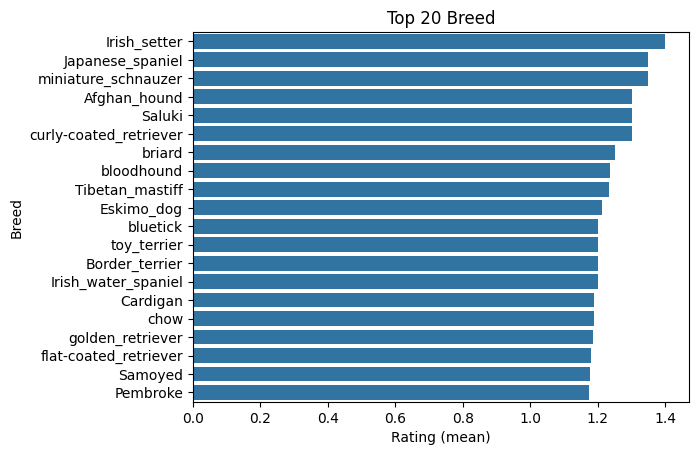

In [160]:
base_color = sb.color_palette()[0]
sb.barplot(x='rating', y="p1", data=df_rating, color=base_color);
plt.xlabel('Rating (mean)');
plt.ylabel('Breed');
plt.title('Top 20 Breed');